<a href="https://colab.research.google.com/github/dehpour/Reactor-Antineutrino-Flux-Analysis/blob/main/ILL's%20Phenomenological%20Model%20Predicted%20Antineutrino%20Flux%20Compare%20with%20Recently%20Observations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
from sympy import diff,solve,Eq

# U-235 Spectra


Load predicted antineutrino spectra for U-235 according beta spectra from ILL paper [1] and fit on that with chi-squared method. Hence we have spectra function per energy.

In [2]:
ILL_235U = pd.read_csv('https://raw.githubusercontent.com/dehpour/Reactor-Antineutrino-Flux-Analysis/main/db/ILL_1985_235U.csv')
E_ILL_235U, N_ILL_235U, err_ILL_235U = ILL_235U['E'], ILL_235U['N_nu'], ILL_235U['N_nu err']
#ILL_235U

In [3]:
from sympy.abc import a,b,c,d,e,f
chi_sq = []

for i in range (len(N_ILL_235U)):
    chi_sq.append((((N_ILL_235U[i]) - (a + b*(E_ILL_235U[i]) + c*(E_ILL_235U[i])**2 + d*(E_ILL_235U[i])**3 + e*(E_ILL_235U[i])**4+f*(E_ILL_235U[i])**5))/((err_ILL_235U[i]*N_ILL_235U[i])/100))**2)
    i += 1
chi_sq = sum(chi_sq)

eq1 = Eq(diff(chi_sq,a), 0)
eq2 = Eq(diff(chi_sq,b), 0)
eq3 = Eq(diff(chi_sq,c), 0)
eq4 = Eq(diff(chi_sq,d), 0)
eq5 = Eq(diff(chi_sq,e), 0)
eq6 = Eq(diff(chi_sq,f), 0)
sol = solve((eq1,eq2,eq3,eq4,eq5,eq6), (a, b, c, d, e, f))
a_0_235U, a_1_235U, a_2_235U, a_3_235U, a_4_235U,a_5_235U = np.float(sol[a]), np.float(sol[b]), np.float(sol[c]), np.float(sol[d]), np.float(sol[e]), np.float(sol[f])

Load Daya Bay (DYB) and PROSPECT experimental data from [2,3]. Note that spectra must per 12 hr per 1 MeV per fission (fission energy equal to 203 MeV), these data per 24 hr (because we want compare with ILL results), so we divide by 2.
Another hand PROSPECT data per 200 keV and we must convert to per 1 MeV per fission.

In [4]:
DYB_235U = pd.read_csv('https://raw.githubusercontent.com/dehpour/Reactor-Antineutrino-Flux-Analysis/main/db/DYB_2019_235U.csv')
E_DYB_235U, N_DYB_235U = DYB_235U['E'], DYB_235U['N_nu']/2
pd.DataFrame({'E':E_DYB_235U, 'N_nu':N_DYB_235U}).head()

,E,N_nu
0,0.849549,0.047054
1,1.120361,0.182415
2,1.373119,0.335457
3,1.619860,0.476720
4,1.872618,0.626817


In [5]:
PROSPECT_235U = pd.read_csv('https://raw.githubusercontent.com/dehpour/Reactor-Antineutrino-Flux-Analysis/main/db/PROSPECT_2018_235U.csv')
E_PROSPECT_235U, N_PROSPECT_235U = PROSPECT_235U['E'], ((202.36*1000)/200)*PROSPECT_235U['N_nu']*10**-6/2
pd.DataFrame({'E':E_PROSPECT_235U, 'N_nu':N_PROSPECT_235U}).head()

,E,N_nu
0,0.898990,0.309316
1,1.101010,0.566459
2,1.303030,0.620496
3,1.501443,0.740682
4,1.699856,0.899067


In [6]:
#SRP_235U = pd.read_csv('https://raw.githubusercontent.com/dehpour/Reactor-Antineutrino-Flux-Analysis/main/db/SRP_1986_235U.csv')
#E_SRP_235U, N_SRP_235U = SRP_235U['E'], SRP_235U['N_nu (near)']
#pd.DataFrame({'E':E_SRP_235U, 'N_nu':N_SRP_235U}).head()

In [7]:
#STEREO_235U = pd.read_csv('https://raw.githubusercontent.com/dehpour/Reactor-Antineutrino-Flux-Analysis/main/db/STEREO_2020_235U.csv')
#E_STEREO_235U, N_STEREO_235U = STEREO_235U['E'], STEREO_235U['N_nu']
#pd.DataFrame({'E':E_STEREO_235U, 'N_nu':N_STEREO_235U}).head()

In [8]:
#NU4_235U = pd.read_csv('https://raw.githubusercontent.com/dehpour/Reactor-Antineutrino-Flux-Analysis/main/db/NU4_2020_235U.csv')
#E_NU4_235U, N_NU4_235U = NU4_235U['E'], NU4_235U['N_nu']
#pd.DataFrame({'E':E_NU4_235U, 'N_nu':N_NU4_235U}).head()

In [9]:
#NEOS_235U = pd.read_csv('https://raw.githubusercontent.com/dehpour/Reactor-Antineutrino-Flux-Analysis/main/db/NEOS_2020_235U.csv')
#E_NEOS_235U, N_NEOS_235U = NEOS_235U['E'], NEOS_235U['N_nu']
#pd.DataFrame({'E':E_NEOS_235U, 'N_nu':N_NEOS_235U}).head()

In [10]:
#Rovno = pd.read_csv('https://raw.githubusercontent.com/dehpour/Reactor-Antineutrino-Flux-Analysis/main/db/Rovno_2013.csv')
#E_Rovno_235U, N_Rovno_235U = Rovno['E'], Rovno['N_nu 235U']
#pd.DataFrame({'E':E_Rovno_235U, 'N_nu':N_Rovno_235U}).head()

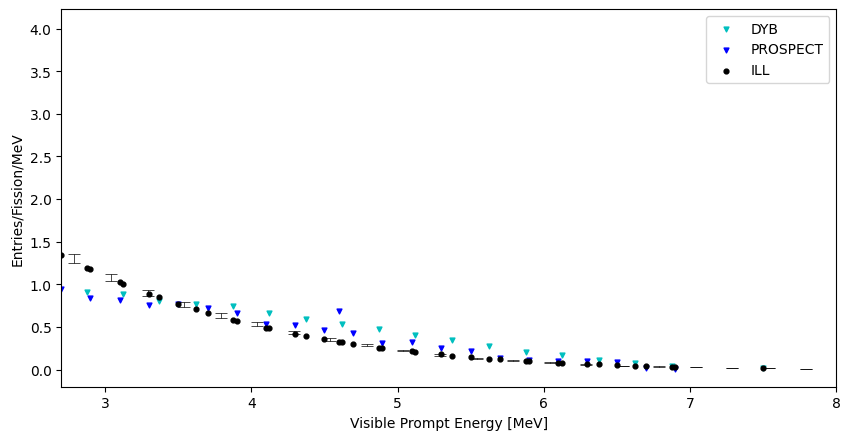

In [11]:
plt.figure(figsize=(10, 5),dpi=100)
plt.xlim(2.7,8)

plt.scatter(E_DYB_235U, N_DYB_235U, label="DYB", c='c', marker='v', s=12)
plt.scatter(E_PROSPECT_235U, N_PROSPECT_235U, label="PROSPECT", c='blue', marker='v', s=12)
#plt.scatter(E_SRP_235U, N_SRP_235U, label="SRP", c='r', marker='v', s=12)
#plt.scatter(E_STEREO_235U, N_STEREO_235U, label="STEREO", c='yellow', marker='v', s=12)
#plt.scatter(E_NU4_235U, N_NU4_235U, label="Neutrino-4", c='green', marker='v', s=12)
#plt.scatter(E_NEOS_235U, N_NEOS_235U, label="NEOS", c='black', marker='v', s=12)
#plt.scatter(E_Rovno_235U, N_Rovno_235U, label="Rovno", c='orange', marker='v', s=12)

plt.errorbar(E_ILL_235U+0.79, (N_ILL_235U), yerr=((err_ILL_235U*N_ILL_235U)/100), linestyle="None", c='black',capsize=4.5,capthick=0.5,elinewidth=0.5)

plt.scatter(E_DYB_235U, (a_0_235U+a_1_235U*(E_DYB_235U-0.79)+a_2_235U*(E_DYB_235U-0.79)**2+a_3_235U*(E_DYB_235U-0.79)**3+a_4_235U*(E_DYB_235U-0.79)**4+a_5_235U*(E_DYB_235U-0.79)**5), label="ILL", c='black', marker='o', s=12)
plt.scatter(E_PROSPECT_235U, (a_0_235U+a_1_235U*(E_PROSPECT_235U-0.79)+a_2_235U*(E_PROSPECT_235U-0.79)**2+a_3_235U*(E_PROSPECT_235U-0.79)**3+a_4_235U*(E_PROSPECT_235U-0.79)**4+a_5_235U*(E_PROSPECT_235U-0.79)**5), c='black', marker='o', s=12)

plt.xlabel('Visible Prompt Energy [MeV]')
plt.ylabel('Entries/Fission/MeV')
plt.legend()
plt.show()

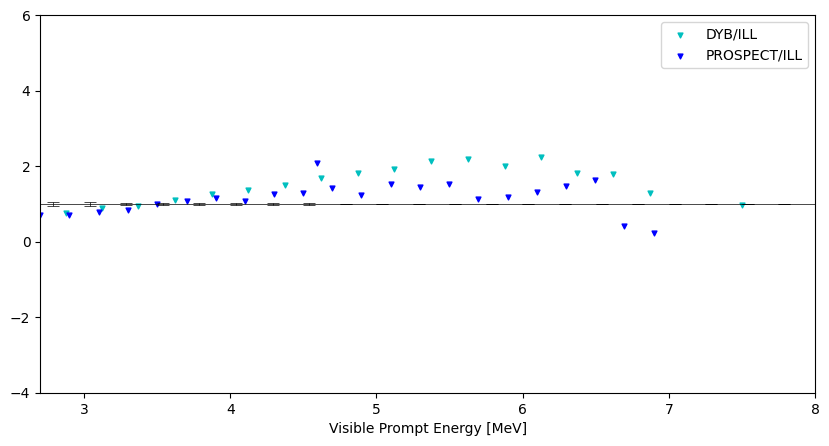

In [12]:
plt.figure(figsize=(10, 5),dpi=100)
plt.xlim(2.7,8)
plt.ylim(-4,6)

plt.scatter(E_DYB_235U, (N_DYB_235U)/(a_0_235U+a_1_235U*(E_DYB_235U-0.79)+a_2_235U*(E_DYB_235U-0.79)**2+a_3_235U*(E_DYB_235U-0.79)**3+a_4_235U*(E_DYB_235U-0.79)**4+a_5_235U*(E_DYB_235U-0.79)**5), label="DYB/ILL", c='c', marker='v', s=12)
plt.scatter(E_PROSPECT_235U, (N_PROSPECT_235U)/(a_0_235U+a_1_235U*(E_PROSPECT_235U-0.79)+a_2_235U*(E_PROSPECT_235U-0.79)**2+a_3_235U*(E_PROSPECT_235U-0.79)**3+a_4_235U*(E_PROSPECT_235U-0.79)**4+a_5_235U*(E_PROSPECT_235U-0.79)**5), label="PROSPECT/ILL", c='b', marker='v', s=12)

plt.errorbar(E_ILL_235U+0.79, (N_ILL_235U/N_ILL_235U), yerr=((err_ILL_235U*N_ILL_235U)/100), linestyle="None", c='black',capsize=4.5,capthick=0.5,elinewidth=0.5)
plt.axhline(y=1, color='black', linestyle='-',linewidth=0.5)

plt.xlabel('Visible Prompt Energy [MeV]')
plt.legend()
plt.show()

# Pu-239

Load predicted antineutrino spectra for Pu-239 according beta spectra from ILL paper [4] and fit on that with chi-squared method. Hence we have spectra function per energy.

In [13]:
ILL_239Pu = pd.read_csv('https://raw.githubusercontent.com/dehpour/Reactor-Antineutrino-Flux-Analysis/main/db/ILL_1989_239Pu.csv')
E_ILL_239Pu, N_ILL_239Pu, err_ILL_239Pu = ILL_239Pu['E'], ILL_239Pu['N_nu'], ILL_239Pu['N_nu err']
#ILL_239Pu

In [14]:
from sympy.abc import a,b,c,d,e,f
chi_sq = []

for i in range (len(N_ILL_239Pu)):
    chi_sq.append((((N_ILL_239Pu[i]) - (a + b*(E_ILL_239Pu[i]) + c*(E_ILL_239Pu[i])**2 + d*(E_ILL_239Pu[i])**3 + e*(E_ILL_239Pu[i])**4+f*(E_ILL_239Pu[i])**5))/((err_ILL_239Pu[i]*N_ILL_239Pu[i])/100))**2)
    i += 1
    
chi_sq = sum(chi_sq)

eq1 = Eq(diff(chi_sq,a), 0)
eq2 = Eq(diff(chi_sq,b), 0)
eq3 = Eq(diff(chi_sq,c), 0)
eq4 = Eq(diff(chi_sq,d), 0)
eq5 = Eq(diff(chi_sq,e), 0)
eq6 = Eq(diff(chi_sq,f), 0)
sol = solve((eq1,eq2,eq3,eq4,eq5,eq6), (a, b, c, d, e, f))
a_0_239Pu, a_1_239Pu, a_2_239Pu, a_3_239Pu, a_4_239Pu,a_5_239Pu = np.float(sol[a]), np.float(sol[b]), np.float(sol[c]), np.float(sol[d]), np.float(sol[e]), np.float(sol[f])

Load Daya Bay (DYB) experimental data from [2]. Note that spectra must per 12 hr per 1 MeV per fission (fission energy equal to 203 MeV), these data per 24 hr (because we want compare with ILL results), so we divide by 2.

In [15]:
DYB_239Pu = pd.read_csv('https://raw.githubusercontent.com/dehpour/Reactor-Antineutrino-Flux-Analysis/main/db/DYB_2019_239Pu.csv')
E_DYB_239Pu, N_DYB_239Pu = DYB_239Pu['E'], DYB_239Pu['N_nu']/2
pd.DataFrame({'E':E_DYB_239Pu, 'N_nu':N_DYB_239Pu}).head()

,E,N_nu
0,0.849549,0.020545
1,1.126379,0.155902
2,1.373119,0.314838
3,1.625878,0.451681
4,1.872618,0.536979


In [16]:
#NEOS_239Pu = pd.read_csv('https://raw.githubusercontent.com/dehpour/Reactor-Antineutrino-Flux-Analysis/main/db/NEOS_2020_239Pu.csv')
#E_NEOS_239Pu, N_NEOS_239Pu = NEOS_239Pu['E'], NEOS_239Pu['N_nu']
#pd.DataFrame({'E':E_NEOS_239Pu, 'N_nu':N_NEOS_239Pu}).head()

In [17]:
#Rovno = pd.read_csv('https://raw.githubusercontent.com/dehpour/Reactor-Antineutrino-Flux-Analysis/main/db/Rovno_2013.csv')
#E_Rovno_239Pu, N_Rovno_239Pu = Rovno_239Pu['E'], Rovno_239Pu['N_nu 239Pu']
#pd.DataFrame({'E':E_Rovno_239Pu, 'N_nu':N_Rovno_239Pu}).head()

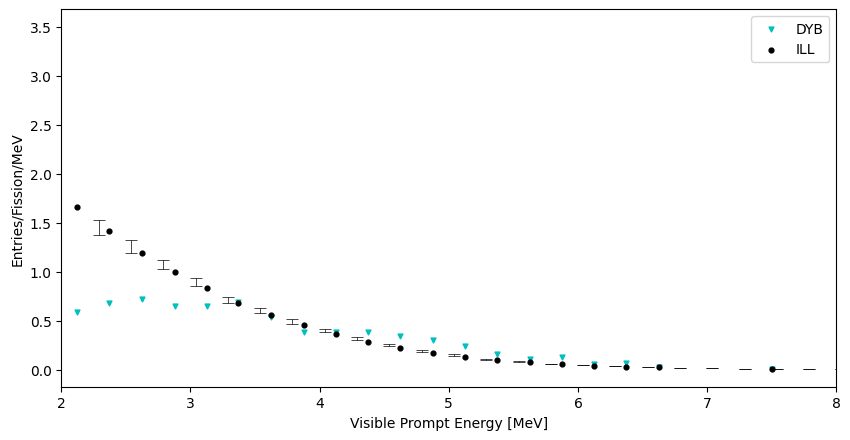

In [18]:
plt.figure(figsize=(10, 5),dpi=100)
plt.xlim(2,8)

plt.scatter(E_DYB_239Pu, N_DYB_239Pu, label="DYB", c='c', marker='v', s=12)
#plt.scatter(E_NEOS_239Pu, N_NEOS_239Pu, label="NEOS", c='black', marker='v', s=12)
#plt.scatter(E_Rovno_239Pu, N_Rovno_239Pu, label="Rovno", c='orange', marker='v', s=12)

plt.errorbar(E_ILL_239Pu+0.79, (N_ILL_239Pu), yerr=((err_ILL_239Pu*N_ILL_239Pu)/100), linestyle="None", c='black',capsize=4.5,capthick=0.5,elinewidth=0.5)

plt.scatter(E_DYB_239Pu, (a_0_239Pu+a_1_239Pu*(E_DYB_239Pu-0.79)+a_2_239Pu*(E_DYB_239Pu-0.79)**2+a_3_239Pu*(E_DYB_239Pu-0.79)**3+a_4_239Pu*(E_DYB_239Pu-0.79)**4+a_5_239Pu*(E_DYB_239Pu-0.79)**5), label="ILL", c='black', marker='o', s=12)

plt.xlabel('Visible Prompt Energy [MeV]')
plt.ylabel('Entries/Fission/MeV')
plt.legend()
plt.show()

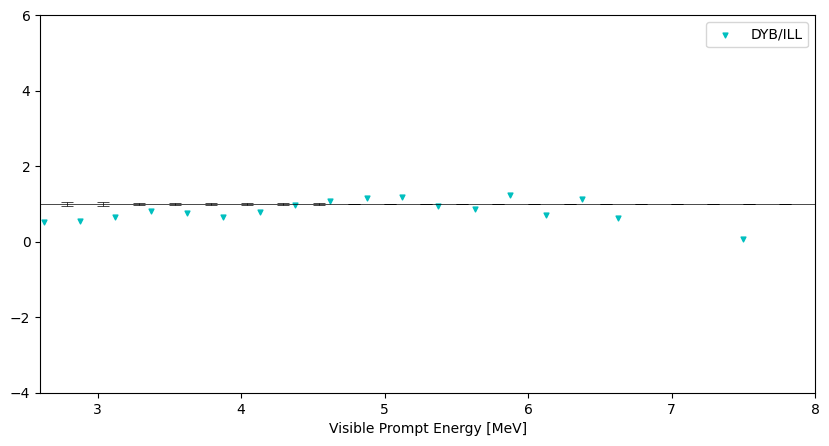

In [19]:
plt.figure(figsize=(10, 5),dpi=100)
plt.xlim(2.6,8)
plt.ylim(-4,6)

plt.scatter(E_DYB_239Pu, (N_DYB_239Pu)/(a_0_235U+a_1_235U*(E_DYB_239Pu-0.79)+a_2_235U*(E_DYB_239Pu-0.79)**2+a_3_235U*(E_DYB_239Pu-0.79)**3+a_4_235U*(E_DYB_239Pu-0.79)**4+a_5_235U*(E_DYB_239Pu-0.79)**5), label="DYB/ILL", c='c', marker='v', s=12)

plt.errorbar(E_ILL_235U+0.79, (N_ILL_235U/N_ILL_235U), yerr=((err_ILL_235U*N_ILL_235U)/100), linestyle="None", c='black',capsize=4.5,capthick=0.5,elinewidth=0.5)
plt.axhline(y=1, color='black', linestyle='-',linewidth=0.5)

plt.xlabel('Visible Prompt Energy [MeV]')
plt.legend()
plt.show()

# References: <br>
[ILL]
<a href="/https://www.sciencedirect.com/science/article/abs/pii/0370269385913371"> Schreckenbach, K. et al. (1985). Determination of the antineutrino spectrum from 235-U thermal neutron fission products up to 9.5 MeV.</a><br>
[ILL]
<a href="/https://www.sciencedirect.com/science/article/abs/pii/0370269389915980"> Hahn, A. A., et al. (1989). Antineutrino spectra from 241-Pu and 239-Pu thermal neutron fission products.</a><br>
[DYB]
<a href="/https://journals.aps.org/prl/pdf/10.1103/PhysRevLett.123.111801" target="_blank"> Adey, D., et al. (2019). Extraction of the 235-U and 239-Pu Antineutrino Spectra at Daya Bay.</a><br>
[PROSPECT]
<a href="https://arxiv.org/pdf/1812.10877.pdf" target="_blank"> Ashenfelter, J., et al. (2018). Measurement of the Antineutrino Spectrum from 235-U Fission at HFIR with PROSPECT</a><br>
[SRP]
<a href="https://aip.scitation.org/doi/abs/10.1063/1.36070"> Greenwood, Z. D. (1986). Neutrino-oscillation experiments at reactors. AIP Conference Proceedings.</a><br>
[Neutrino-4]
<a href="https://arxiv.org/abs/2005.05301"> A.P. Serebrov. et al. (2020). Experiment Neutrino-4 search for sterile neutrino and results of measurements.</a><br>
[NEOS]
<a href="https://iopscience.iop.org/article/10.1088/1742-6596/1468/1/012185"> Yoomin Oh. (2020). NEOS: reactor neutrino experiment at short baseline.</a><br>
[Rovno]
<a href="https://doi.org/10.1134/S106377881304011X"> V. V. Sinev. (2013). Experimental spectrum of reactor antineutrinos and spectra of main fissile isotopes.</a><br>